### Практическое задание

#### Импортируем нужные библиотеки

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
import seaborn as sns
sns.set()

#### Загружаем данные

In [2]:
raw = pd.read_csv('1.04. Real-life example.csv')
raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Подготовка

In [3]:
raw.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Избавимся от переменной "Модель", так как при использовании в модели предется делать более 300 переменных "пустышек" для конвертации качественной переменной в количественную.

In [4]:
data = raw.drop(['Model'], axis=1)

In [5]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Определяем количество нулевых значений в датафрейме

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Один из методов управления пропущенными данными - удаление строк с таковыми. Так как количество их незначительно, их отсутствие сильно не повлияет на модель

In [7]:
data_no_NaN = data.dropna(axis=0)

In [8]:
data_no_NaN.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Рассмотрим функцию плотности вероятности

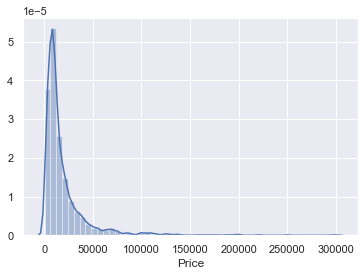

In [9]:
sns.distplot(data_no_NaN['Price'])

#### Разбираемся с выбросами

У нас минимальная цена 600, максимальная 300000. При этом 75% всех автомобилей стоят меньше 21900. Откининем 1% крайне высоких значений выборки

In [10]:
q = data_no_NaN['Price'].quantile(0.99)
data_1 = data_no_NaN[data_no_NaN['Price']<q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


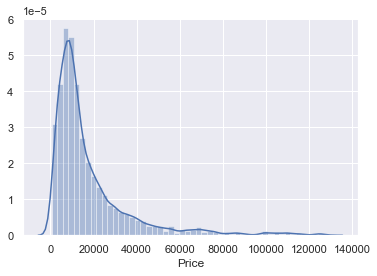

In [11]:
sns.distplot(data_1['Price'])

Также рассмотрим показатель пробега. Аналогично цене можно откинуть 1 процент, машин с самым большим пробегом

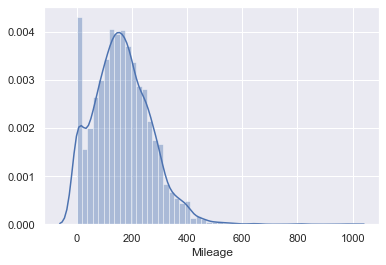

In [12]:
sns.distplot(data_1['Mileage'])

In [13]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

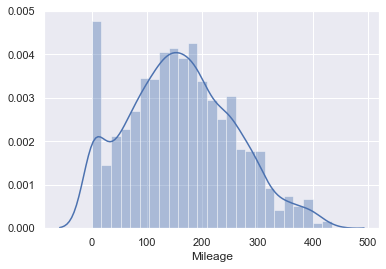

In [14]:
sns.distplot(data_2['Mileage'])

В показателе объема двигателя обнаружена ошибка, так как объем не может быть больше 6,5 литров, а у нас имеются данные, вплоть до 99,99 литров. Исключаем их. 

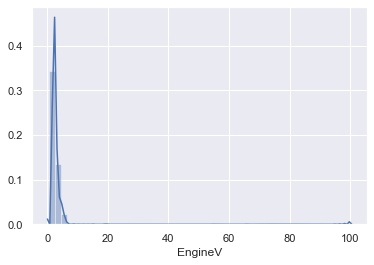

In [15]:
sns.distplot(data_2['EngineV'])

In [16]:
data_3 = data_2[data_2['EngineV']<6.5]

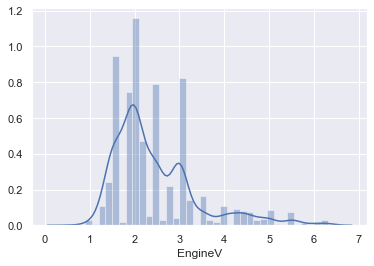

In [17]:
sns.distplot(data_3['EngineV'])

В выборке присутствуют винтажные модели автомобилей, что тоже выделяется из общей картины. В данном случае откинем 1% старых автомобилей.

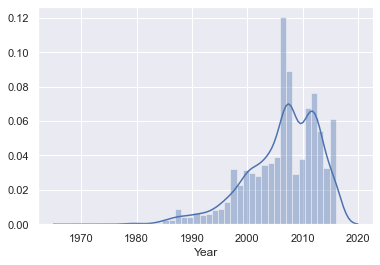

In [18]:
sns.distplot(data_3['Year'])

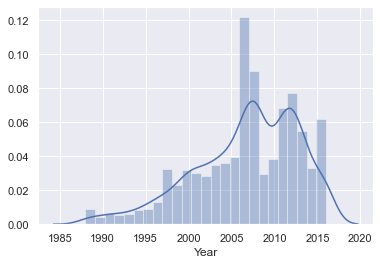

In [19]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

In [20]:
data_cleaned = data_4.reset_index(drop = True)

In [21]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Проверка допущений МНК

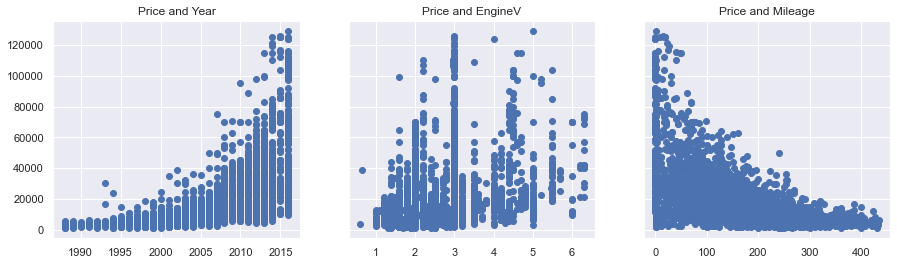

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,4))
ax1.scatter (data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter (data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter (data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

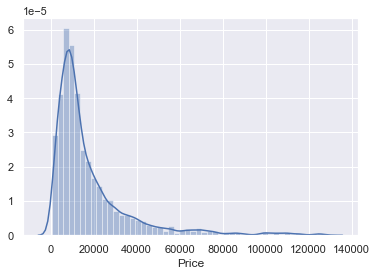

In [23]:
sns.distplot(data_cleaned['Price'])

Не похоже, что сырые данные подходят для линейной регрессии. Распределние схоже на экспоненциальное. Произведем замену на ln price

In [24]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


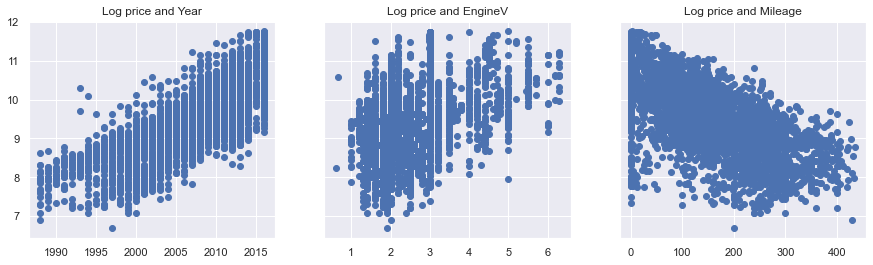

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,4))
ax1.scatter (data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log price and Year')
ax2.scatter (data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log price and EngineV')
ax3.scatter (data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log price and Mileage')

plt.show()

Теперь линейный паттерн заметен во всех переменных. Теперь можно удалить столбец с оригинальной ценой

In [26]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [27]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

Мультиколлинеарность. Логично, что переменные "год" и "пробег" коррелируют друг с другом. Проверим это через statsmodels, ведь в sklearn нет подходящих инструментов.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range (variables.shape[1])]
vif ['features'] = variables.columns

In [29]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


Если vif = 1 то нет мультиколлинеарности
1 < vif < 5 приемлемая мультиколлинеарность.
А вот если больше 5, то необходимо убирать переменную. В нашем случае уберем переменную с наибольшим значением vif, то есть "год".

In [30]:
data_no_mult = data_cleaned.drop(['Year'],axis=1)

#### Создание пустышек для качетсвенных переменных

In [31]:
data_dummies = pd.get_dummies(data_no_mult, drop_first = True)

In [32]:
data_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


#### Поменяем порядок колонок

In [33]:
data_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [35]:
data_preprocessed = data_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Модель линейной регрессии

#### Задаем х и у. 

In [36]:
y = data_preprocessed['log_price']
x = data_preprocessed.drop(['log_price'], axis=1)

#### Стандартизируем данные

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
x_scaled = scaler.transform(x)

#### Поделим данные на тестовую, тренировочную части

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=42)

#### Создаем регрессию

In [40]:
reg = LR()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_hat = reg.predict(x_train)

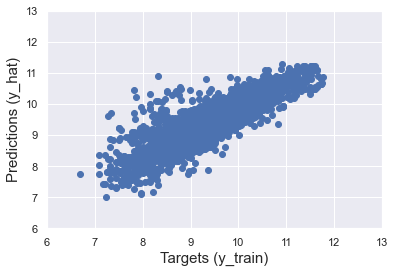

In [42]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', fontsize = 15)
plt.ylabel('Predictions (y_hat)', fontsize = 15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Данным способом мы проверяем как предсказанные данные сопопстовляются с реальными тренеровочными данными. В идеале они должны сопоставляться 1 к 1 и получится линия под углом 45 градусов от 0. В нашем случае это не так, однако нельзя сказать, что данные распределены случайно.

Другой способ - график остатков

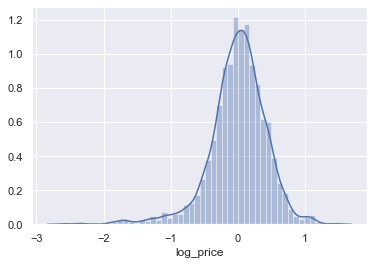

In [43]:
sns.distplot(y_train - y_hat)

На первый взгляд остатки распределены нормально со средней в нуле. Однако стоит обратить внимание на количество отрицательных выбросов. Для которых предсказанная цена выше, чем реальная.

In [44]:
reg.score(x_train, y_train)

0.7546487921881218

In [45]:
reg.intercept_

9.421003614148074

In [46]:
reg.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [47]:
reg_summ = pd.DataFrame(x.columns.values, columns = ['Features'])
reg_summ['Weights'] = reg.coef_
reg_summ

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


Знак показателя веса говорит о том, что цена и показатель с весом изменяются в одном направлении. Если "+" , то растут, если "-", то падают.

Также, положительный вест качественных переменных (пустышек) говорит о том, что они дороже эталонной марки (benchmark). В нашем случае, это Ауди.

И, собственно, чем выше значение по модую, тем выше влияние на цену.

In [48]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Тест

In [49]:
y_hat_test = reg.predict(x_test)

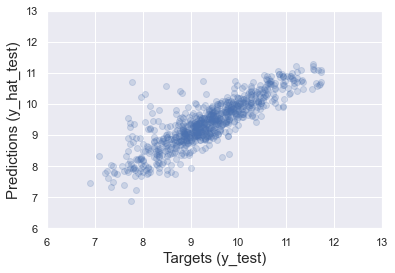

In [50]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Targets (y_test)', fontsize = 15)
plt.ylabel('Predictions (y_hat_test)', fontsize = 15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [51]:
df_pf = pd.DataFrame(y_hat_test, columns = ['Prediction'])

In [52]:
df_pf.head()

,Prediction
0,10.607063
1,8.981794
2,8.658221
3,9.186643
4,8.857567


Так как у нас в датафрейме логарифм цены, то нам надо взять экспонентую.

In [53]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])
df_pf.head()

,Prediction
0,40419.308971
1,7956.895960
2,5757.284408
3,9765.810605
4,7027.363814


In [54]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,40419.308971,4200.0
1,7956.895960,NaN
2,5757.284408,NaN
3,9765.810605,NaN
4,7027.363814,NaN
...,...,...
769,4699.586013,NaN
770,9123.067372,NaN
771,6267.803094,NaN
772,20906.128600,NaN


Как видим, у нас иного отсутсвующих данных, это связано с оригинальными индексами, которые остались после деления данных на test/train. Избавимся от них. 

In [55]:
y_test

2174     9.966462
1420     9.093807
2478     8.086410
1584     9.392662
952      8.594154
          ...    
2683     8.342840
1159     9.082507
2447     8.486734
2458    10.203592
691      9.296518
Name: log_price, Length: 774, dtype: float64

In [56]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.966462
1    9.093807
2    8.086410
3    9.392662
4    8.594154
Name: log_price, dtype: float64

In [57]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0
...,...,...
769,4699.586013,4200.0
770,9123.067372,8800.0
771,6267.803094,4850.0
772,20906.128600,27000.0


Добавим в наш датафрейм столбцы с разницей в абсолютном и относительном выражении.

In [58]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [59]:
df_pf.head()

,Prediction,Target,Residual
0,40419.308971,21300.0,-19119.308971
1,7956.895960,8900.0,943.104040
2,5757.284408,3250.0,-2507.284408
3,9765.810605,12000.0,2234.189395
4,7027.363814,5400.0,-1627.363814


In [60]:
df_pf['Diff']=np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [61]:
df_pf

,Prediction,Target,Residual,Diff
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367
...,...,...,...,...
769,4699.586013,4200.0,-499.586013,11.894905
770,9123.067372,8800.0,-323.067372,3.671220
771,6267.803094,4850.0,-1417.803094,29.233053
772,20906.128600,27000.0,6093.871400,22.569894


In [62]:
df_pf.describe(include = 'all')

,Prediction,Target,Residual,Diff
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


In [63]:
pd.options.display.max_rows = 775
pd.set_option('display.float_format', lambda x:'%.2f' % x)
df_pf.sort_values(by = ['Diff'], ascending=False) 

,Prediction,Target,Residual,Diff
681,45259.02,2400.00,-42859.02,1785.79
750,30076.59,3150.00,-26926.59,854.81
219,27632.40,2900.00,-24732.40,852.84
280,39469.51,4800.00,-34669.51,722.28
713,13941.93,2200.00,-11741.93,533.72
556,20887.21,3500.00,-17387.21,496.78
260,33893.01,6500.00,-27393.01,421.43
58,11913.91,2300.00,-9613.91,418.00
562,31429.04,6800.00,-24629.04,362.19
747,10572.99,2300.00,-8272.99,359.70


Как можно заметить, максимальная разница предсказанной и реальной ценой заметна в наиболее дешевых автомобилях. Возможно это связано с тем, что избавились от переменной "Модель" в самом начале исследования или не учли другие факторы, влияющие на стоимость автомобиля, например: поломки.
Именно эти наблюдения можно заметить на графике справа.

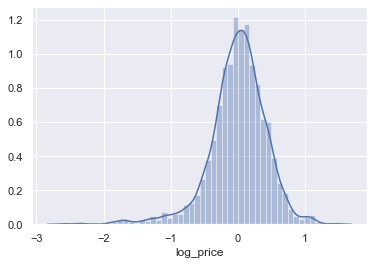

In [64]:
sns.distplot(y_train - y_hat)